In [3]:
from pathlib import Path

import numpy as np
from PIL import Image
from anomalib import TaskType
from anomalib.data.image.btech import BTech, BTechDataset
from torchvision.transforms.v2 import Resize
from torchvision.transforms.v2.functional import to_pil_image

In [4]:
dataset_root = Path.cwd() / "data" / "BTech"

In [5]:
btech_datamodule = BTech(
    root=dataset_root,
    category="01",
    image_size=(256, 256),
    train_batch_size=32,
    eval_batch_size=32,
    num_workers=0,
    task=TaskType.SEGMENTATION,
)

In [6]:
btech_datamodule.prepare_data()
btech_datamodule.setup()

In [7]:
i, data = next(enumerate(btech_datamodule.train_dataloader()))
print(data.keys(), data["image"].shape)

dict_keys(['image_path', 'label', 'image', 'mask']) torch.Size([32, 3, 256, 256])


In [8]:
i, data = next(enumerate(btech_datamodule.test_dataloader()))
print(data.keys(), data["image"].shape, data["mask"].shape)

dict_keys(['image_path', 'label', 'image', 'mask']) torch.Size([32, 3, 256, 256]) torch.Size([32, 256, 256])


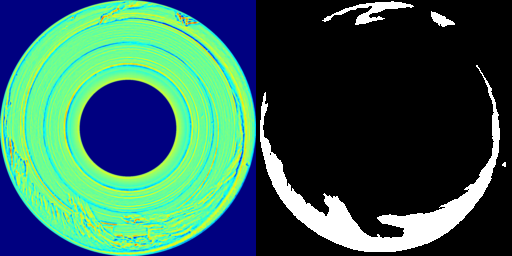

In [9]:
img = to_pil_image(data["image"][0].clone())
msk = to_pil_image(data["mask"][0]).convert("RGB")

Image.fromarray(np.hstack((np.array(img), np.array(msk)*255)))

In [10]:
image_size = (256, 256)
transform = Resize(image_size, antialias=True)

In [11]:
btech_dataset_classification_train = BTechDataset(
    root=dataset_root,
    category="01",
    transform=transform,
    split="train",
    task=TaskType.CLASSIFICATION,
)
btech_dataset_classification_train.samples.head()

,path,split,label,image_path,mask_path,label_index
0,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,train,ok,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,0
1,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,train,ok,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,0
2,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,train,ok,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,0
3,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,train,ok,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,0
4,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,train,ok,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,0


In [12]:
sample = btech_dataset_classification_train[0]
print(sample.keys(), sample["image"].shape)

dict_keys(['image_path', 'label', 'image']) torch.Size([3, 256, 256])


In [13]:
btech_dataset_classification_test = BTechDataset(
    root=dataset_root,
    category="01",
    transform=transform,
    split="test",
    task=TaskType.CLASSIFICATION,
)
sample = btech_dataset_classification_test[0]
print(sample.keys(), sample["image"].shape, sample["image_path"], sample["label"])

dict_keys(['image_path', 'label', 'image']) torch.Size([3, 256, 256]) C:\Users\User\Studia\6 sem\wykrywanie anomali\beantech-anomaly-detector\src\data\BTech\01/test/ko/0000.png 1


In [14]:
btech_dataset_segmentation_train = BTechDataset(
    root=dataset_root,
    category="01",
    transform=transform,
    split="train",
    task=TaskType.SEGMENTATION,
)
btech_dataset_segmentation_train.samples.head()

,path,split,label,image_path,mask_path,label_index
0,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,train,ok,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,0
1,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,train,ok,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,0
2,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,train,ok,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,0
3,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,train,ok,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,0
4,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,train,ok,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,C:\Users\User\Studia\6 sem\wykrywanie anomali\...,0


In [15]:
btech_dataset_segmentation_test = BTechDataset(
    root=dataset_root,
    category="01",
    transform=transform,
    split="test",
    task=TaskType.SEGMENTATION,
)
sample = btech_dataset_segmentation_test[20]
print(sample.keys(), sample["image"].shape, sample["mask"].shape)

dict_keys(['image_path', 'label', 'image', 'mask']) torch.Size([3, 256, 256]) torch.Size([256, 256])


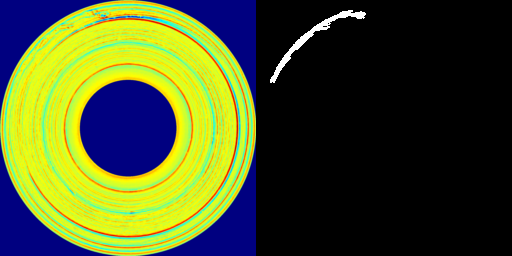

In [16]:
img = to_pil_image(sample["image"].clone())
msk = to_pil_image(sample["mask"]).convert("RGB")

Image.fromarray(np.hstack((np.array(img), np.array(msk)*255)))

In [17]:
# Import the required modules
from anomalib.models import Padim
from anomalib.engine import Engine


# Specify backbone and layers
model = Padim(backbone="resnet18", layers=["layer1", "layer2"])
engine = Engine(image_metrics=["AUROC"], pixel_metrics=["AUROC"])

# Train the model
engine.fit(datamodule=btech_datamodule, model=model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
C:\Users\User\Studia\6 sem\wykrywanie anomali\beantech-anomaly-detector\venv\lib\site-packages\lightning\pytorch\core\optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | PadimModel               | 683 K 
1 | _transform            | Compose                  | 0     
2 | normalization_metrics | MinMax                   | 0     
3 | image_threshold       | F1AdaptiveThreshold      | 0     
4 | pixel_threshold       | F1AdaptiveThreshold      | 0     
5 | image_metrics         | AnomalibMetricCollection | 0     
6 | pixel_metri

Training: |          | 0/? [00:00<?, ?it/s]

C:\Users\User\Studia\6 sem\wykrywanie anomali\beantech-anomaly-detector\venv\lib\site-packages\lightning\pytorch\loops\optimization\automatic.py:129: `training_step` returned `None`. If this was on purpose, ignore this warning...


Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


In [18]:
engine.test(datamodule=btech_datamodule, model=model)

C:\Users\User\Studia\6 sem\wykrywanie anomali\beantech-anomaly-detector\venv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│        pixel_AUROC        │    0.9692872762680054     │
└───────────────────────────┴───────────────────────────┘

[{'pixel_AUROC': 0.9692872762680054, 'image_AUROC': 1.0}]

In [20]:
engine.predict(datamodule=btech_datamodule, model=model)

ckpt_path is not provided. Model weights will not be loaded.
C:\Users\User\Studia\6 sem\wykrywanie anomali\beantech-anomaly-detector\venv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

[{'image_path': ['C:\\Users\\User\\Studia\\6 sem\\wykrywanie anomali\\beantech-anomaly-detector\\src\\data\\BTech\\01/test/ko/0000.png',
   'C:\\Users\\User\\Studia\\6 sem\\wykrywanie anomali\\beantech-anomaly-detector\\src\\data\\BTech\\01/test/ko/0001.png',
   'C:\\Users\\User\\Studia\\6 sem\\wykrywanie anomali\\beantech-anomaly-detector\\src\\data\\BTech\\01/test/ko/0002.png',
   'C:\\Users\\User\\Studia\\6 sem\\wykrywanie anomali\\beantech-anomaly-detector\\src\\data\\BTech\\01/test/ko/0003.png',
   'C:\\Users\\User\\Studia\\6 sem\\wykrywanie anomali\\beantech-anomaly-detector\\src\\data\\BTech\\01/test/ko/0004.png',
   'C:\\Users\\User\\Studia\\6 sem\\wykrywanie anomali\\beantech-anomaly-detector\\src\\data\\BTech\\01/test/ko/0005.png',
   'C:\\Users\\User\\Studia\\6 sem\\wykrywanie anomali\\beantech-anomaly-detector\\src\\data\\BTech\\01/test/ko/0006.png',
   'C:\\Users\\User\\Studia\\6 sem\\wykrywanie anomali\\beantech-anomaly-detector\\src\\data\\BTech\\01/test/ko/0007.png',
  

In [72]:
from anomalib.data import PredictDataset
from torch.utils.data import DataLoader

inference_dataset = PredictDataset(path=dataset_root / "01/test/ko/0000.png")
inference_dataloader = DataLoader(dataset=inference_dataset)
predictions = engine.predict(model=model, dataloaders=inference_dataloader)[0]

ckpt_path is not provided. Model weights will not be loaded.


Predicting: |          | 0/? [00:00<?, ?it/s]

In [73]:
image_path = predictions["image_path"][0]
image_size = predictions["image"].shape[-2:]
image = np.array(Image.open(image_path).resize(image_size))

In [74]:
from anomalib.utils.post_processing import superimpose_anomaly_map
from matplotlib import pyplot as plt
anomaly_map = predictions["anomaly_maps"][0]
anomaly_map = anomaly_map.cpu().numpy().squeeze()
Image.fromarray(anomaly_map)

<PIL.Image.Image image mode=F size=256x256>

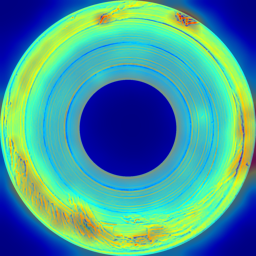

In [75]:
heat_map = superimpose_anomaly_map(anomaly_map=anomaly_map, image=image, normalize=True)
Image.fromarray(heat_map)

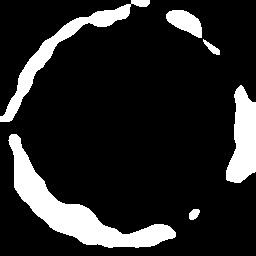

In [76]:
pred_masks = predictions["pred_masks"][0].squeeze().cpu().numpy()
Image.fromarray(pred_masks)